In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
train_dir = '/content/drive/MyDrive/Banana Leaf Disease/images/training/'
test_dir = '/content/drive/MyDrive/Banana Leaf Disease/images/testing/'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1214 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=12,
    epochs=50,
    validation_data=test_generator,
    validation_steps=5
)

<ipython-input-8-50fc5dc0b162>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
12/12 [==============================] - 67s 4s/step - loss: 1.7089 - accuracy: 0.5495
Epoch 2/50
12/12 [==============================] - 42s 3s/step - loss: 0.8024 - accuracy: 0.6562
Epoch 3/50
12/12 [==============================] - 29s 2s/step - loss: 0.6840 - accuracy: 0.7016
Epoch 4/50
12/12 [==============================] - 66s 6s/step - loss: 0.6336 - accuracy: 0.7135
Epoch 5/50
12/12 [==============================] - 16s 1s/step - loss: 0.6107 - accuracy: 0.7474
Epoch 6/50
12/12 [==============================] - 11s 908ms/step - loss: 0.4817 - accuracy: 0.8063
Epoch 7/50
12/12 [==============================] - 5s 443ms/step - loss: 0.5781 - accuracy: 0.7422
Epoch 8/50
12/12 [==============================] - 4s 335ms/step - loss: 0.5550 - accuracy: 0.7356
Epoch 9/50
12/12 [==============================] - 3s 223ms/step - loss: 0.5283 - accuracy: 0.7592
Epoch 10/50
12/12 [==============================] - 2s 184ms/step - loss: 0.5067 - accuracy: 0.7656
Epoch 11

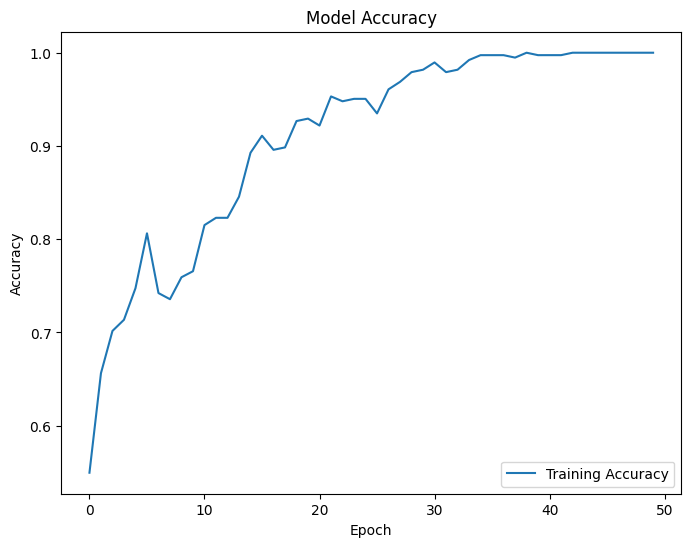

In [9]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 19ms/step
Confusion matrix:
 [[ 1  3 11]
 [ 0 15 15]
 [ 1  4 25]]


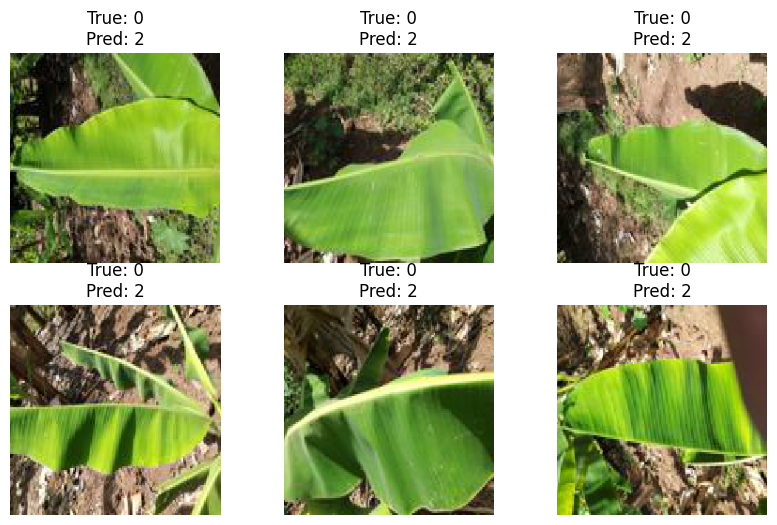

In [10]:
# Define the testing folder
testing_folder = '/content/drive/MyDrive/Banana Leaf Disease/images/testing'

# Create empty lists to store predictions and true labels
predictions = []
true_labels = []

# Iterate over all images in the testing folder
for file_name in os.listdir(testing_folder):
    # Load the image and preprocess it
    img_path = os.path.join(testing_folder, file_name)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    # Make a prediction and get the predicted label
    pred_probs = model.predict(img)
    pred_label = np.argmax(pred_probs, axis=1)[0]
    predictions.append(pred_label)

    # Extract the true label from the file name
    true_label = int(file_name.split('_')[0])
    true_labels.append(true_label)

# Convert the predictions and true labels into numpy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Calculate the accuracy and print the confusion matrix
accuracy = accuracy_score(true_labels, predictions)
conf_mat = confusion_matrix(true_labels, predictions)
print('Confusion matrix:\n', conf_mat)

# Plot some sample images with their predicted labels
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()
for i in range(6):
    img_path = os.path.join(testing_folder, os.listdir(testing_folder)[i])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    axs[i].imshow(img.astype(int))
    axs[i].set_title('True: {}\nPred: {}'.format(true_labels[i], predictions[i]))
    axs[i].axis('off')
plt.show()

1/1 [==============================] - 0s 20ms/step


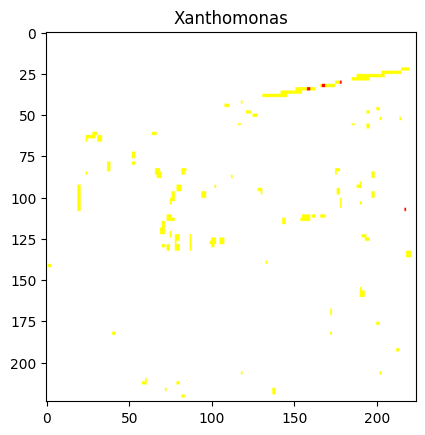


The test image is a Xanthomonas leaf.


In [36]:
test_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Banana Leaf Disease/images/testing/2_3.jpg', target_size=(224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'Healthy'
elif result[0][1] == 1:
    prediction = 'Sigatoka'
else:
    prediction = 'Xanthomonas'

plt.imshow(test_image[0])
plt.title(prediction)
plt.show()

print('')
print('The test image is a', prediction, 'leaf.')

1/1 [==============================] - 0s 29ms/step


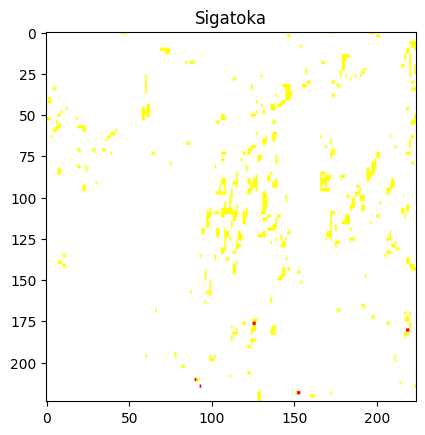


The test image is a Sigatoka leaf.


In [38]:
test_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Banana Leaf Disease/images/testing/1_29.jpg', target_size=(224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'Healthy'
elif result[0][1] == 1:
    prediction = 'Sigatoka'
else:
    prediction = 'Xanthomonas'

plt.imshow(test_image[0])
plt.title(prediction)
plt.show()

print('')
print('The test image is a', prediction, 'leaf.')

1/1 [==============================] - 0s 21ms/step


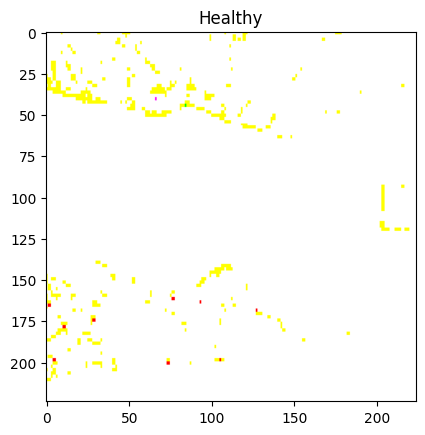


The test image is a Healthy leaf.


In [39]:
test_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Banana Leaf Disease/images/testing/0_5.jpg', target_size=(224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'Healthy'
elif result[0][1] == 1:
    prediction = 'Sigatoka'
else:
    prediction = 'Xanthomonas'

plt.imshow(test_image[0])
plt.title(prediction)
plt.show()

print('')
print('The test image is a', prediction, 'leaf.')